In [0]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
import umap

In [0]:
df = pd.read_csv('/dbfs/FileStore/export_cab.csv')


In [0]:
print(df.shape)
#df.head(2)
#df_cols = df.columns.values
df2 = df.loc[(df['POLICYSTATE'] == 'CA') & (df['POLICY_EFF_DT'].str.contains('2017'))].groupby('POLICYID').agg({'POLICYID': np.max,'POLICYSTATE': np.max, 'YRSINBUSCT': np.max, 'VEHICLE_COUNT': np.max}).reset_index(drop=True)
print(df2.shape)
df2 = df2.loc[:,['YRSINBUSCT','VEHICLE_COUNT']]
df2.head(2)

(239253, 98)
(3056, 4)
Out[6]:

,YRSINBUSCT,VEHICLE_COUNT
0,9.0,2.0
1,9.0,5.0


In [0]:
df.head(2)
tmp = df.loc[(df['POLICYSTATE'] == 'CA') & (df['POLICY_EFF_DT'].str.contains('2017'))].groupby('POLICYID').agg({'POLICYID': np.max,'POLICYSTATE': np.max, 'YRSINBUSCT': np.max, 'VEHICLE_COUNT': np.max})

In [0]:
df2.isnull().sum()

Out[8]: YRSINBUSCT 1
VEHICLE_COUNT 0
dtype: int64

In [0]:
tmp.head(2)

Out[9]:

,POLICYID,POLICYSTATE,YRSINBUSCT,VEHICLE_COUNT
POLICYID,,,,
CAI0048753,CAI0048753,CA,9.0,2.0
CAI0054498,CAI0054498,CA,9.0,5.0


In [0]:
#Dropping NA values as they are very less
df2 = df2.dropna()
print(df2.shape)

(3055, 2)

Vechile Count Analysis

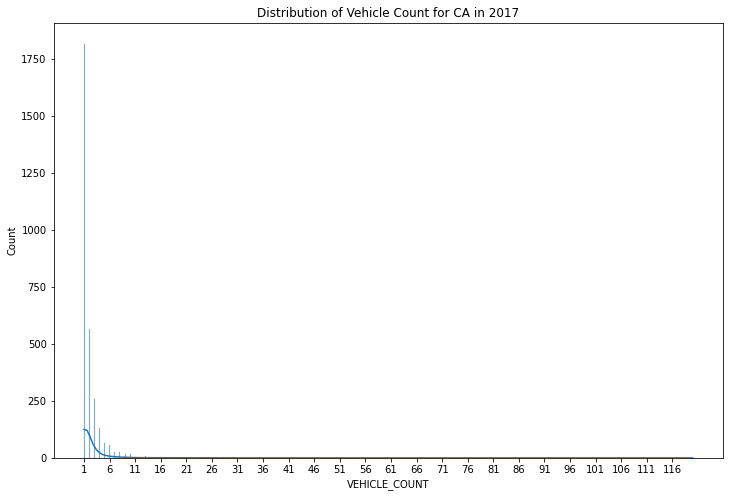

In [0]:
xlabel = df2['VEHICLE_COUNT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.histplot(x=xlabel,data=df2,kde=True)
plt.title('Distribution of Vehicle Count for CA in 2017')
plt.xticks(xticks)
plt.show()

Observations
1. We have Right skewed Data
2. We have most number of polciies with just 1 Vehicle on it.
3. Most ofte policies have vehile count less than or equal to 6.

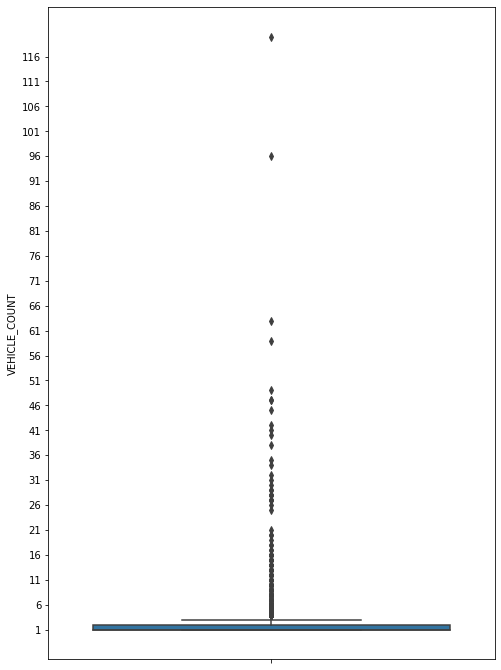

In [0]:
plt.figure(figsize=(8,12))
sns.boxplot(x=None,y=xlabel,data=df2)
plt.yticks(xticks)
plt.show()

Based on above Box plot, Most ofthe vehicles we have written have IQR as 1 to 11.

Better segmenattion based on percentiles is given below.

In [0]:
#Calculate percentile values in vehicle count.
vehicle_count_values = xlabel.values
percentiles = np.arange(0,100+10,10)
for p in percentiles:
  print('{} th percentage of vehicles we have written has vehicle count less than or equal to {}'.format(p,np.percentile(vehicle_count_values,p)))
# print('*'*20)
# ninty_plus_percentiles = np.arange(90,100,1)
# for p in ninty_plus_percentiles:
#   print('{} th percentage of vehicles we have written has vehicle count less than or equal to {}'.format(p,np.percentile(vehicle_count_values,p)))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2965149488182877> in <module> 
 1 #Calculate percentile values in vehicle count. 
 ----> 2 vehicle_count_values = xlabel . values
 3 percentiles = np . arange ( 0 , 100 + 10 , 10 ) 
 4 for p in percentiles : 
 5 print ( '{} th percentage of vehicles we have written has vehicle count less than or equal to {}' . format ( p , np . percentile ( vehicle_count_values , p ) ) ) 

 NameError : name 'xlabel' is not defined

50% of the vehicles we have written in CA are having less than or equal to 3 vehicles on it.

Years in Business Analysis

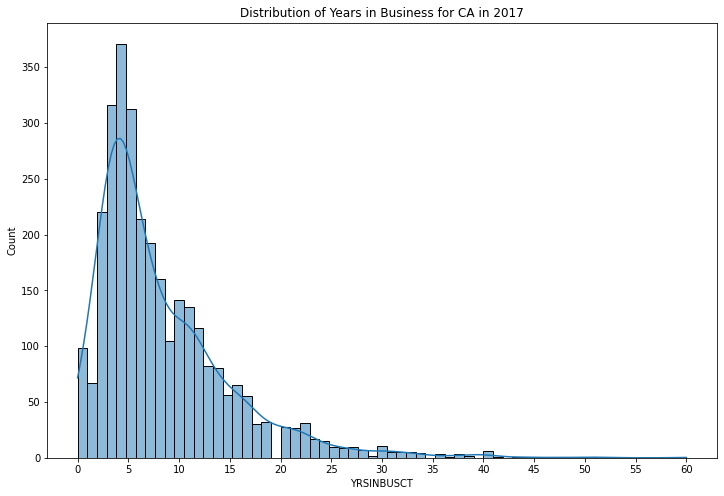

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.histplot(x=xlabel,data=df2,kde=True)
plt.title('Distribution of Years in Business for CA in 2017')
plt.xticks(xticks)
plt.show()

Observations:
1. Most of the polcies we have written are having age around 3-8 years
2. Dataset is Right skewed,very less polcies have years in business more than 35.

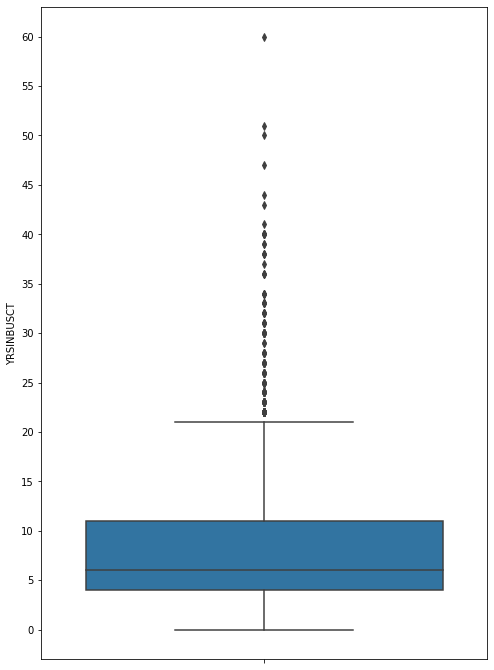

In [0]:
plt.figure(figsize=(8,12))
sns.boxplot(x=None,y=xlabel)
plt.yticks(xticks)
plt.show()


Observation:
Median business is around 6.
IQR is in between 3 to 12.

In [0]:
yrs_bus_values = xlabel.values
percentiles = np.arange(0,100+10,10)
for p in percentiles:
  print('{} th percentage of vehicles we have written has years in business less than or equal to {}'.format(p,np.percentile(yrs_bus_values,p)))

0 th percentage of vehicles we have written has years in business less than or equal to 0.0
10 th percentage of vehicles we have written has years in business less than or equal to 2.0
20 th percentage of vehicles we have written has years in business less than or equal to 3.0
30 th percentage of vehicles we have written has years in business less than or equal to 4.0
40 th percentage of vehicles we have written has years in business less than or equal to 5.0
50 th percentage of vehicles we have written has years in business less than or equal to 6.0
60 th percentage of vehicles we have written has years in business less than or equal to 8.0
70 th percentage of vehicles we have written has years in business less than or equal to 10.0
80 th percentage of vehicles we have written has years in business less than or equal to 12.0
90 th percentage of vehicles we have written has years in business less than or equal to 17.0
100 th percentage of vehicles we have written has years in business less than or equal to 60.0

60 % of policies we have written in California in 2017 has Years in business less than 8 years.

Out[17]:

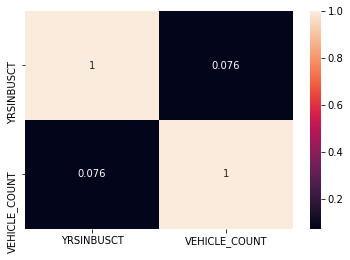

<AxesSubplot:>

In [0]:
# Is there any correlation between Number of Vehicles and Years in business for policies in CA for 2017.
sns.heatmap(df2.corr(),annot=True)

At least for the vehicles we have written for CA in 2017, Vehicle count and Years in business are not strongly correlated.

Bivariate Analysis

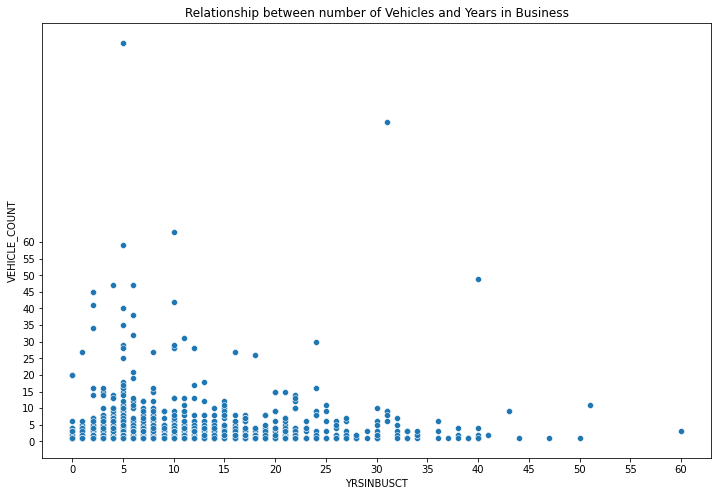

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2)
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Relationship between number of Vehicles and Years in Business')
plt.show()


Clustering

In [0]:
#Clustering on raw features:
from sklearn.cluster import KMeans,DBSCAN

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard = StandardScaler()
minMax = MinMaxScaler()
df2[['VEHICLE_COUNT_STD','YRSINBUSCT_STD']] = standard.fit_transform(df2[['VEHICLE_COUNT','YRSINBUSCT']])
df2[['VEHICLE_COUNT_NML','YRSINBUSCT_NML']] = minMax.fit_transform(df2[['VEHICLE_COUNT','YRSINBUSCT']])

In [0]:
df2.head(5)

Out[21]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML
0,9.0,2.0,-0.091703,0.110487,0.008403,0.150000
1,9.0,5.0,0.537855,0.110487,0.033613,0.150000
2,11.0,2.0,-0.091703,0.406574,0.008403,0.183333
3,7.0,3.0,0.118150,-0.185599,0.016807,0.116667
4,7.0,5.0,0.537855,-0.185599,0.033613,0.116667


K-Means on Raw features

In [0]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit_predict(df2[['VEHICLE_COUNT','YRSINBUSCT']])
labels = kmeans.labels_
print(min(labels),max(labels))

0 4

In [0]:
df2['kmeans_cluster_id_raw'] = labels
df2.head(2)

Out[23]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1


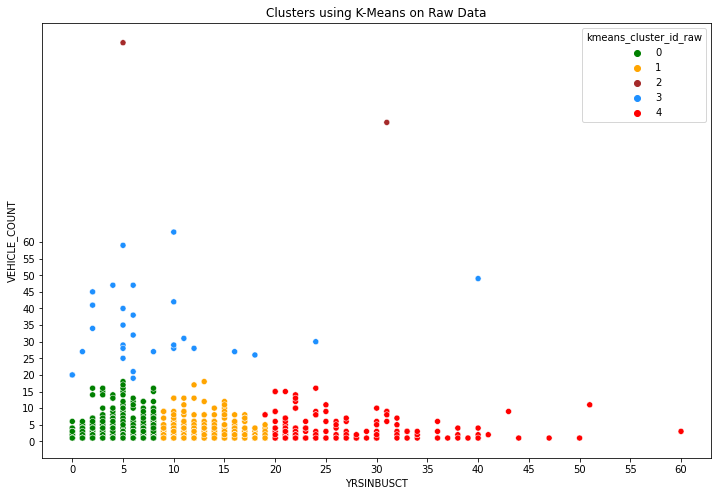

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['kmeans_cluster_id_raw'],palette=['green','orange','brown','dodgerblue','red'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using K-Means on Raw Data')
plt.show()

In [0]:
df2_kmeans_raw_agg = df2.groupby('kmeans_cluster_id_raw').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,cluster_size=('YRSINBUSCT','count')
                                                     )
df2_kmeans_raw_agg.head(10)

Out[25]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,cluster_size
kmeans_cluster_id_raw,,,,,,,
0,1.0,18.0,1.949741,0.0,8.0,4.312435,1930
1,1.0,18.0,2.071026,9.0,19.0,12.678692,887
2,96.0,120.0,108.000000,5.0,31.0,18.000000,2
3,19.0,63.0,34.034483,0.0,40.0,8.275862,29
4,1.0,16.0,3.101449,19.0,60.0,25.942029,207


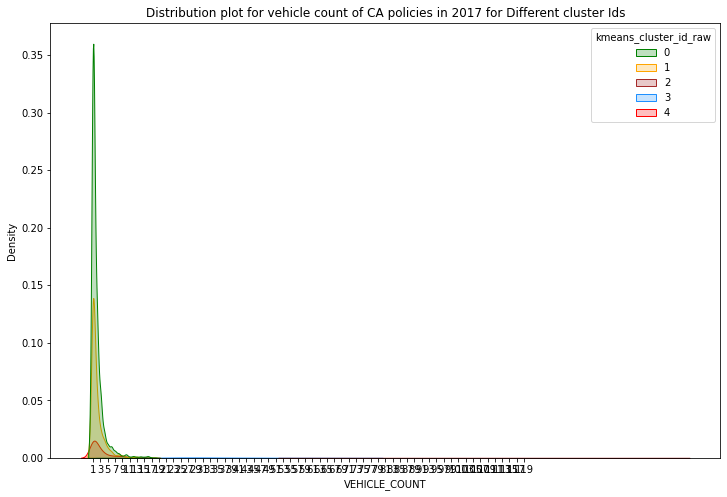

In [0]:
plt.figure(figsize=(12,8))
xlabel = df2['VEHICLE_COUNT']
xticks = np.arange(min(xlabel),max(xlabel)+1,2)
sns.kdeplot(x=df2['VEHICLE_COUNT'],hue=df2['kmeans_cluster_id_raw'],data=df2,palette=['green','orange','brown','dodgerblue','red'],fill=True)
plt.title('Distribution plot for vehicle count of CA policies in 2017 for Different cluster Ids')
plt.xticks(xticks)
plt.show()

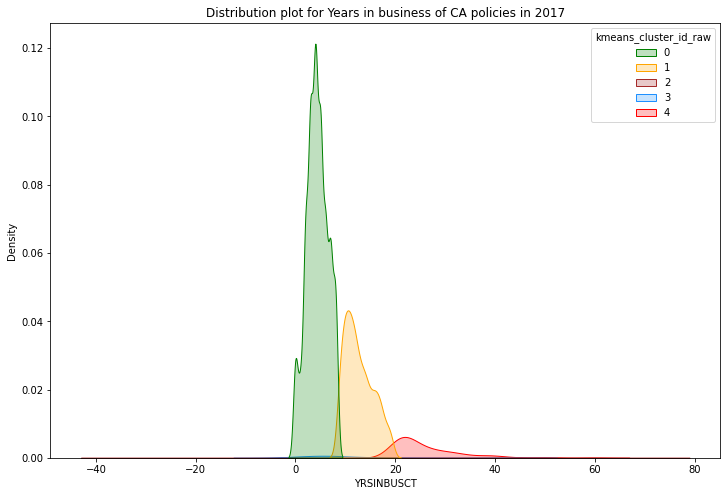

In [0]:
plt.figure(figsize=(12,8))
sns.kdeplot(x=df2['YRSINBUSCT'],hue=df2['kmeans_cluster_id_raw'],data=df2,palette=['green','orange','brown','dodgerblue','red'],fill=True)
plt.title('Distribution plot for Years in business of CA policies in 2017')
plt.show()

KMeans on Standard Features

In [0]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit_predict(df2[['VEHICLE_COUNT_STD','YRSINBUSCT_STD']])
labels = kmeans.labels_
print(min(labels),max(labels))
df2['kmeans_cluster_id_std'] = labels
df2.head(2)

0 4
Out[28]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0


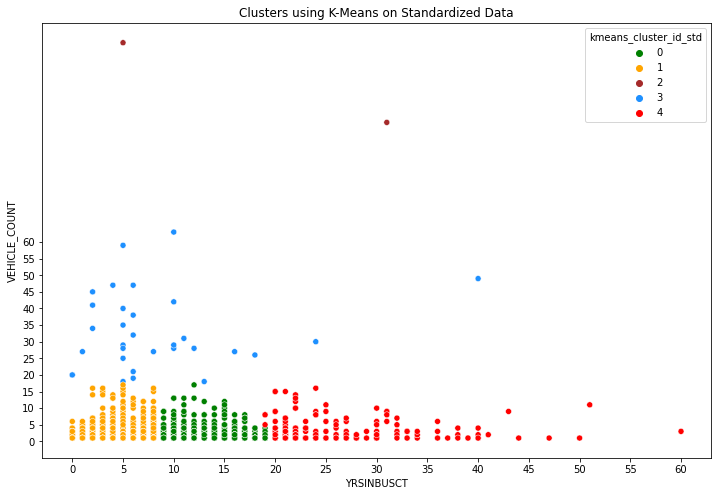

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['kmeans_cluster_id_std'],palette=['green','orange','brown','dodgerblue','red'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using K-Means on Standardized Data')
plt.show()

In [0]:
df2_kmeans_std_agg = df2.groupby('kmeans_cluster_id_std').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,cluster_size=('YRSINBUSCT','count')
                                                     )
df2_kmeans_std_agg.head(10)

Out[30]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,cluster_size
kmeans_cluster_id_std,,,,,,,
0,1.0,17.0,2.049718,9.0,19.0,12.671186,885
1,1.0,17.0,1.941420,0.0,8.0,4.312079,1929
2,96.0,120.0,108.000000,5.0,31.0,18.000000,2
3,18.0,63.0,33.000000,0.0,40.0,8.322581,31
4,1.0,16.0,3.110577,19.0,60.0,25.908654,208


KMeans on Normalized Data:

In [0]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit_predict(df2[['VEHICLE_COUNT_NML','YRSINBUSCT_NML']])
labels = kmeans.labels_
print(min(labels),max(labels))
df2['kmeans_cluster_id_nml'] = labels
df2.head(2)

0 4
Out[31]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4


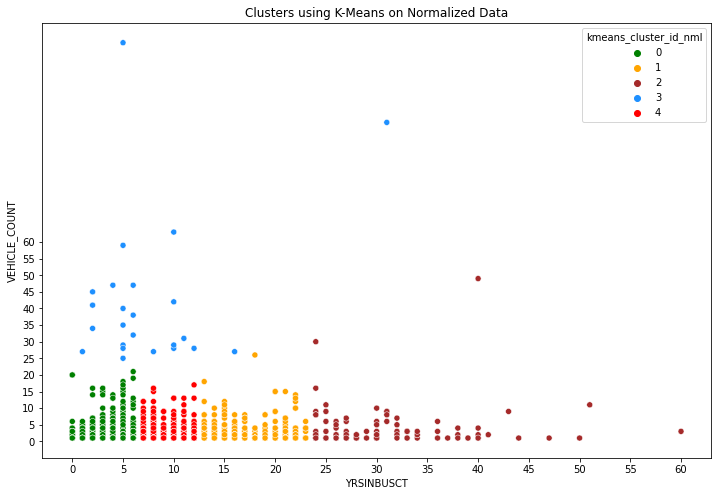

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['kmeans_cluster_id_nml'],palette=['green','orange','brown','dodgerblue','red'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using K-Means on Normalized Data')
plt.show()

In [0]:
df2_kmeans_nml_agg = df2.groupby('kmeans_cluster_id_nml').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,cluster_size=('YRSINBUSCT','count')
                                                     )
df2_kmeans_nml_agg.head(10)

Out[33]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,cluster_size
kmeans_cluster_id_nml,,,,,,,
0,1.0,21.0,1.957675,0.0,6.0,3.612761,1583
1,1.0,26.0,2.412351,13.0,23.0,16.599602,502
2,1.0,49.0,3.759615,24.0,60.0,30.730769,104
3,25.0,120.0,42.416667,1.0,31.0,7.583333,24
4,1.0,17.0,2.049881,7.0,12.0,9.245843,842


DBSCAN on Raw Features:

In [0]:
dbscan = DBSCAN(eps=0.3, min_samples=150)
dbscan.fit_predict(df2[['VEHICLE_COUNT','YRSINBUSCT']])
dbscan_labels = dbscan.labels_
print(min(dbscan_labels),max(dbscan_labels))

-1 2

In [0]:
df2['dbscan_cluster_id'] = dbscan_labels
df2.head(2)

Out[35]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1


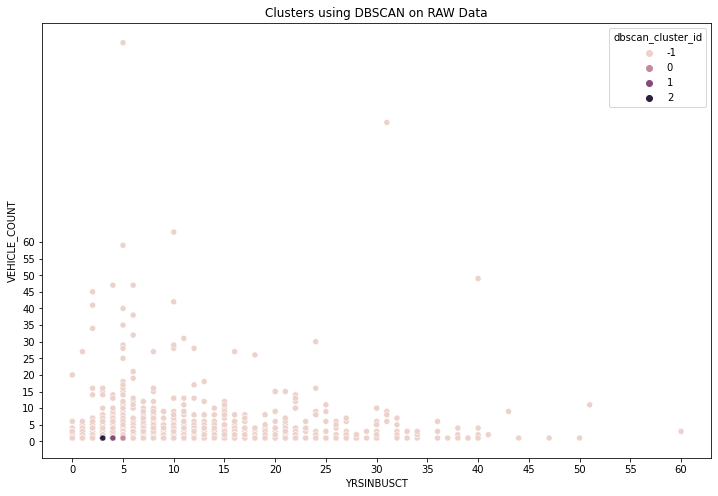

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['dbscan_cluster_id'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using DBSCAN on RAW Data')
plt.show()

In [0]:
df2_dbscan_agg = df2.groupby('dbscan_cluster_id').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_dbscan_agg.head(10)

Out[37]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
dbscan_cluster_id,,,,,,,
-1,1.0,120.0,2.79918,0.0,60.0,9.332377,2440
0,1.0,1.0,1.00000,5.0,5.0,5.000000,184
1,1.0,1.0,1.00000,4.0,4.0,4.000000,231
2,1.0,1.0,1.00000,3.0,3.0,3.000000,200


DBSCAN on Standardized Features:

In [0]:
dbscan = DBSCAN(eps=0.3, min_samples=120)
dbscan.fit_predict(df2[['VEHICLE_COUNT_STD','YRSINBUSCT_STD']])
dbscan_labels = dbscan.labels_
print(min(dbscan_labels),max(dbscan_labels))
df2['dbscan_cluster_id_std'] = dbscan_labels
df2.head(2)

-1 0
Out[38]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1


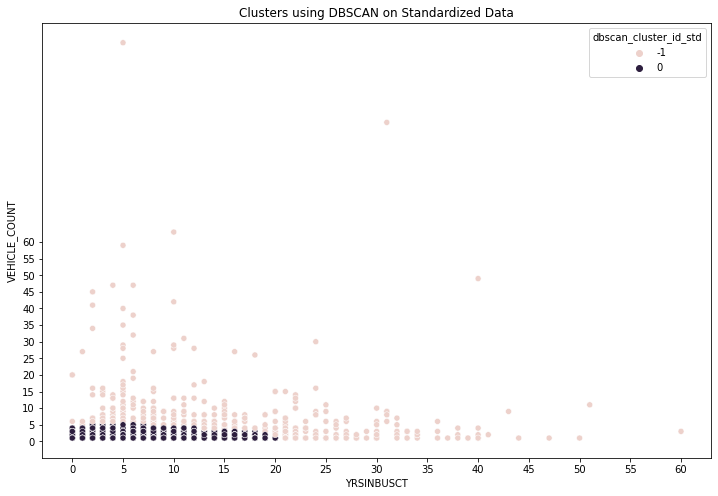

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['dbscan_cluster_id_std'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using DBSCAN on Standardized Data')
plt.show()

Clustered and Not Clustered point analysis using DBSCAN:

In [0]:
df2_dbscan_std_agg = df2.groupby('dbscan_cluster_id_std').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_dbscan_std_agg.head(10)

Out[40]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
dbscan_cluster_id_std,,,,,,,
-1,1.0,120.0,7.775281,0.0,60.0,16.764045,445
0,1.0,5.0,1.526820,0.0,20.0,6.802682,2610


DBSCAN on Normalized Data:

In [0]:
#dbscan = DBSCAN(eps=0.3, min_samples=100)
dbscan = DBSCAN(eps=0.3, min_samples=120)
dbscan.fit_predict(df2[['VEHICLE_COUNT_NML','YRSINBUSCT_NML']])
dbscan_labels = dbscan.labels_
print(min(dbscan_labels),max(dbscan_labels))
df2['dbscan_cluster_id_nml'] = dbscan_labels
df2.head(2)

-1 0
Out[41]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0


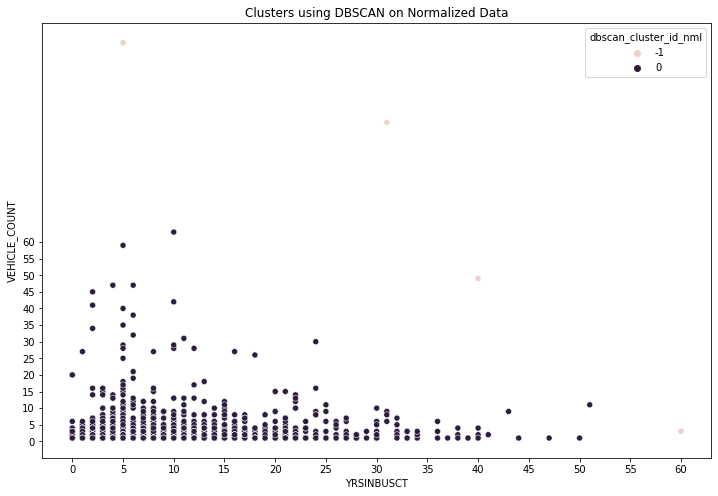

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['dbscan_cluster_id_nml'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using DBSCAN on Normalized Data')
plt.show()

In [0]:
df2_dbscan_nml_agg = df2.groupby('dbscan_cluster_id_nml').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_dbscan_nml_agg.head(10)

Out[43]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
dbscan_cluster_id_nml,,,,,,,
-1,3.0,120.0,67.000000,5.0,60.0,34.000000,4
0,1.0,63.0,2.352343,0.0,51.0,8.219928,3051


Most of the polcies have been classified as same cluster.

HDBSCAN on raw Features:

In [0]:
#hdbscan_cluster = hdbscan.HDBSCAN(min_samples=100,min_cluster_size=100)
hdbscan_cluster = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=220)
hdbscan_cluster.fit_predict(df2[['VEHICLE_COUNT','YRSINBUSCT']])
hdbscan_labels = hdbscan_cluster.labels_
print(min(hdbscan_labels),max(hdbscan_labels))

-1 4

In [0]:
df2['hdbscan_cluster_id'] = hdbscan_labels
df2.head(2)

Out[45]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1


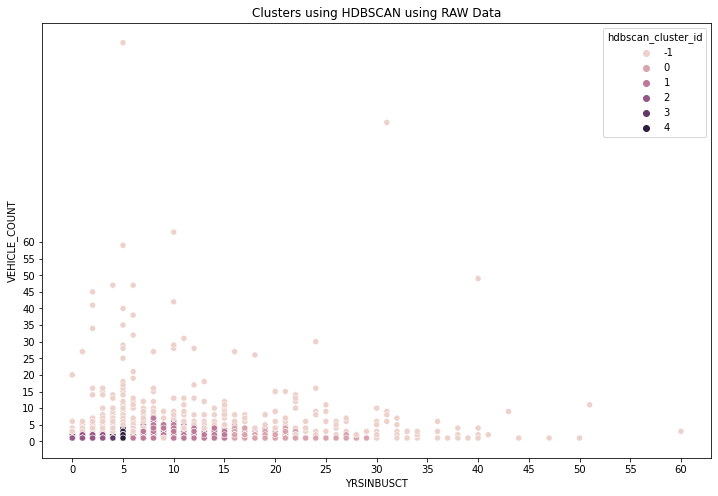

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['hdbscan_cluster_id'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using HDBSCAN using RAW Data')
plt.show()

In [0]:
df2_hdbscan_agg = df2.groupby('hdbscan_cluster_id').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_hdbscan_agg.head(10)

Out[47]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
hdbscan_cluster_id,,,,,,,
-1,1.0,120.0,6.981447,0.0,60.0,11.050093,539
0,1.0,5.0,1.503788,16.0,29.0,19.291667,264
1,1.0,7.0,1.631676,6.0,15.0,9.554328,1086
2,1.0,2.0,1.243243,0.0,3.0,2.060811,592
3,1.0,1.0,1.000000,4.0,4.0,4.000000,231
4,1.0,4.0,1.591837,4.0,5.0,4.798834,343


HDBSCAN on Standardized features:

In [0]:
hdbscan_cluster = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=200)
hdbscan_cluster.fit_predict(df2[['VEHICLE_COUNT_STD','YRSINBUSCT_STD']])
hdbscan_labels = hdbscan_cluster.labels_
print(min(hdbscan_labels),max(hdbscan_labels))
df2['hdbscan_cluster_id_std'] = hdbscan_labels
df2.head(2)

-1 6
Out[48]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1,1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1,-1


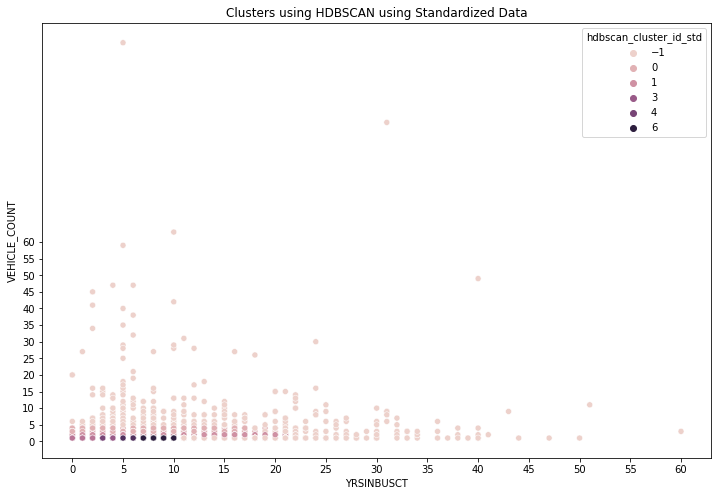

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['hdbscan_cluster_id_std'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using HDBSCAN using Standardized Data')
plt.show()

In [0]:
df2_hdbscan_std_agg = df2.groupby('hdbscan_cluster_id_std').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_hdbscan_std_agg.head(10)

Out[50]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
hdbscan_cluster_id_std,,,,,,,
-1,1.0,120.0,4.664656,0.0,60.0,14.995175,829
0,3.0,4.0,3.324713,0.0,19.0,7.359195,348
1,2.0,2.0,2.000000,0.0,21.0,7.069982,543
2,1.0,1.0,1.000000,0.0,2.0,1.245968,248
3,1.0,1.0,1.000000,4.0,4.0,4.000000,231
4,1.0,1.0,1.000000,3.0,3.0,3.000000,200
5,1.0,1.0,1.000000,5.0,6.0,5.398693,306
6,1.0,1.0,1.000000,7.0,10.0,8.282857,350


HDBSCAN on Normalized features

In [0]:
hdbscan_cluster = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=150)
hdbscan_cluster.fit_predict(df2[['VEHICLE_COUNT_NML','YRSINBUSCT_NML']])
hdbscan_labels = hdbscan_cluster.labels_
print(min(hdbscan_labels),max(hdbscan_labels))
df2['hdbscan_cluster_id_nml'] = hdbscan_labels
df2.head(2)

-1 8
Out[51]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std,hdbscan_cluster_id_nml
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1,1,1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1,-1,1


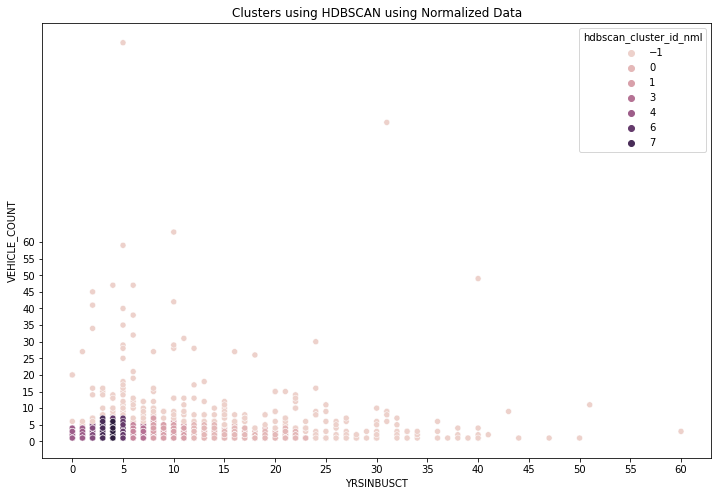

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['hdbscan_cluster_id_nml'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using HDBSCAN using Normalized Data')
plt.show()

In [0]:
df2_hdbscan_std_agg = df2.groupby('hdbscan_cluster_id_nml').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_hdbscan_std_agg.head(10)

Out[53]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
hdbscan_cluster_id_nml,,,,,,,
-1,1.0,120.0,9.972509,0.0,60.0,17.742268,291
0,1.0,5.0,1.610294,12.0,23.0,15.518382,544
1,1.0,7.0,1.741176,8.0,11.0,9.456863,510
2,1.0,5.0,1.640000,6.0,6.0,6.000000,200
3,1.0,5.0,1.627027,7.0,7.0,7.000000,185
4,1.0,4.0,1.417722,0.0,1.0,0.398734,158
5,1.0,5.0,1.519048,2.0,2.0,2.000000,210
6,1.0,7.0,1.770548,4.0,5.0,4.989726,292
7,1.0,7.0,1.675325,3.0,3.0,3.000000,308


Applying log transform on both the features to avoid skew.

In [0]:
df2['VEHICLE_COUNT_LOG'] = df2['VEHICLE_COUNT'].apply(lambda x:np.log(x) if x>0 else 0)
df2['YRSINBUSCT_LOG'] = df2['YRSINBUSCT'].apply(lambda x:np.log(x) if x>0 else 0)

In [0]:
df2.head(10)

Out[55]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std,hdbscan_cluster_id_nml,VEHICLE_COUNT_LOG,YRSINBUSCT_LOG
0,9.0,2.0,-0.091703,0.110487,0.008403,0.150000,1,0,4,-1,0,0,1,1,1,0.693147,2.197225
1,9.0,5.0,0.537855,0.110487,0.033613,0.150000,1,0,4,-1,-1,0,1,-1,1,1.609438,2.197225
2,11.0,2.0,-0.091703,0.406574,0.008403,0.183333,1,0,4,-1,0,0,1,1,1,0.693147,2.397895
3,7.0,3.0,0.118150,-0.185599,0.016807,0.116667,0,1,4,-1,0,0,1,0,3,1.098612,1.945910
4,7.0,5.0,0.537855,-0.185599,0.033613,0.116667,0,1,4,-1,0,0,1,-1,3,1.609438,1.945910
5,6.0,32.0,6.203880,-0.333643,0.260504,0.100000,3,3,3,-1,-1,0,-1,-1,-1,3.465736,1.791759
6,22.0,12.0,2.006824,2.035052,0.092437,0.366667,4,4,1,-1,-1,0,-1,-1,-1,2.484907,3.091042
7,10.0,28.0,5.364469,0.258531,0.226891,0.166667,3,3,3,-1,-1,0,-1,-1,-1,3.332205,2.302585
8,23.0,6.0,0.747708,2.183096,0.042017,0.383333,4,4,1,-1,-1,0,-1,-1,-1,1.791759,3.135494
9,10.0,1.0,-0.301556,0.258531,0.000000,0.166667,1,0,4,-1,0,0,1,6,1,0.000000,2.302585


Distribution of Data after applying Log Transformation:

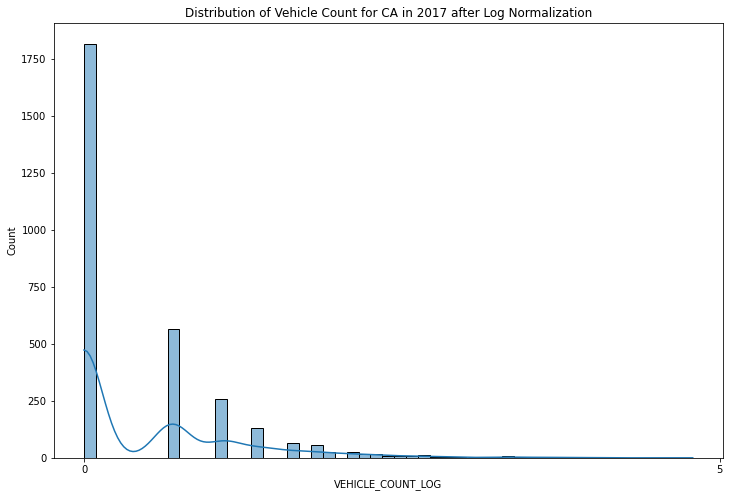

In [0]:
#sns.histplot(x=df2['VEHICLE_COUNT_LOG'],data=df2,kde=True)

xlabel = df2['VEHICLE_COUNT_LOG']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.histplot(x=xlabel,data=df2,kde=True)
plt.title('Distribution of Vehicle Count for CA in 2017 after Log Normalization')
plt.xticks(xticks)
plt.show()


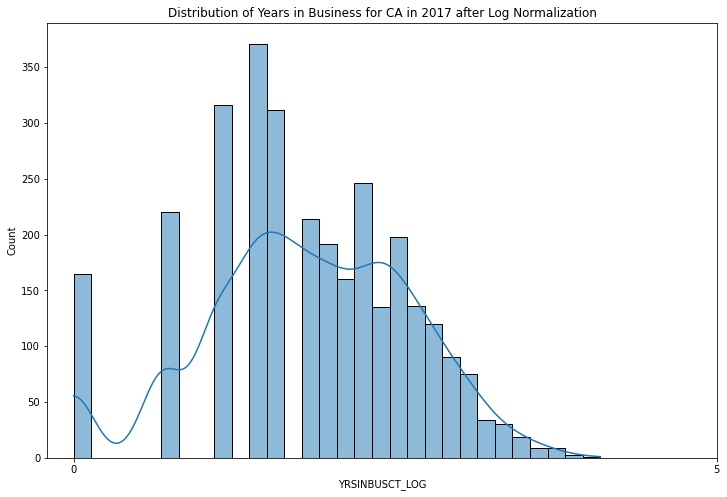

In [0]:
xlabel = df2['YRSINBUSCT_LOG']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.histplot(x=xlabel,data=df2,kde=True)
plt.title('Distribution of Years in Business for CA in 2017 after Log Normalization')
plt.xticks(xticks)
plt.show()


KMeans on Log Normalized Data:

In [0]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit_predict(df2[['VEHICLE_COUNT_LOG','YRSINBUSCT_LOG']])
labels = kmeans.labels_
print(min(labels),max(labels))
df2['kmeans_cluster_id_log'] = labels
df2.head(2)

0 4
Out[58]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std,hdbscan_cluster_id_nml,VEHICLE_COUNT_LOG,YRSINBUSCT_LOG,kmeans_cluster_id_log
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1,1,1,0.693147,2.197225,1
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1,-1,1,1.609438,2.197225,4


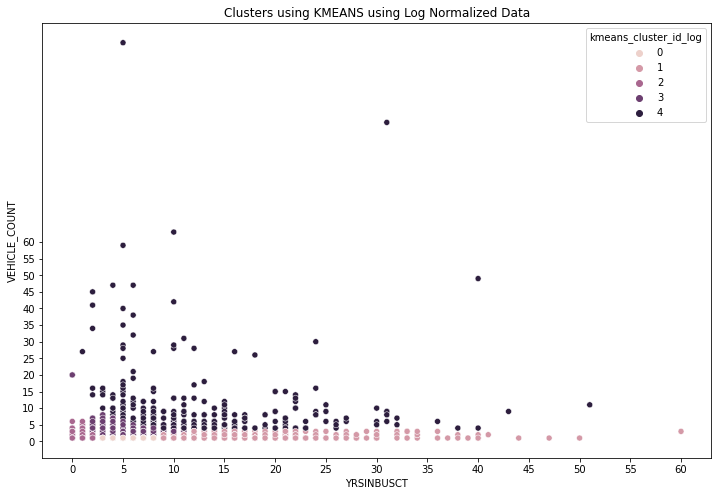

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['kmeans_cluster_id_log'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using KMEANS using Log Normalized Data')
plt.show()

In [0]:
df2_kmeans_log_agg = df2.groupby('kmeans_cluster_id_log').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_kmeans_log_agg.head(10)

Out[60]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
kmeans_cluster_id_log,,,,,,,
0,1.0,1.0,1.000000,3.0,8.0,4.993651,945
1,1.0,3.0,1.377678,9.0,60.0,15.042841,887
2,1.0,6.0,1.397143,0.0,2.0,1.262857,350
3,2.0,20.0,2.945486,0.0,11.0,5.049404,587
4,4.0,120.0,10.699301,1.0,51.0,13.101399,286


DBSCAN on Log Normalized Data:

In [0]:
dbscan = DBSCAN(eps=0.3, min_samples=120)
dbscan.fit_predict(df2[['VEHICLE_COUNT_LOG','YRSINBUSCT_LOG']])
dbscan_labels = dbscan.labels_
print(min(dbscan_labels),max(dbscan_labels))
df2['dbscan_cluster_id_log'] = dbscan_labels
df2.head(2)

-1 2
Out[61]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std,hdbscan_cluster_id_nml,VEHICLE_COUNT_LOG,YRSINBUSCT_LOG,kmeans_cluster_id_log,dbscan_cluster_id_log
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1,1,1,0.693147,2.197225,1,0
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1,-1,1,1.609438,2.197225,4,-1


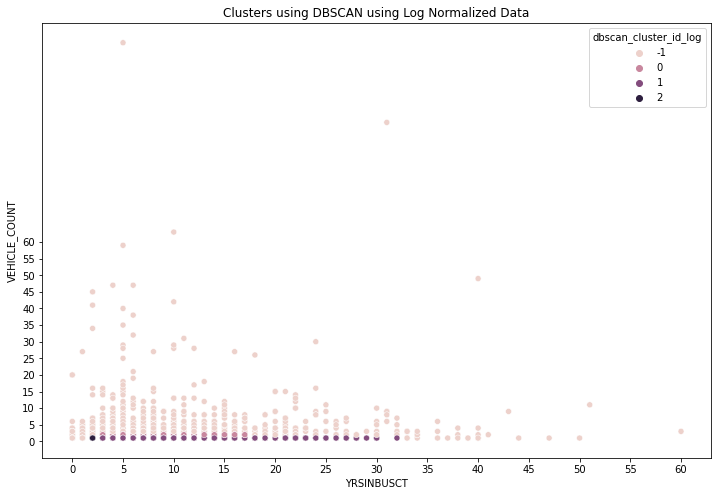

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['dbscan_cluster_id_log'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using DBSCAN using Log Normalized Data')
plt.show()

In [0]:
df2_dbscan_log_agg = df2.groupby('dbscan_cluster_id_log').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_dbscan_log_agg.head(10)

Out[63]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
dbscan_cluster_id_log,,,,,,,
-1,1.0,120.0,5.259978,0.0,60.0,8.982740,927
0,2.0,2.0,2.000000,3.0,17.0,7.507937,441
1,1.0,1.0,1.000000,3.0,32.0,8.565637,1554
2,1.0,1.0,1.000000,2.0,2.0,2.000000,133


HDBSCAN using Log Normalized Data:

In [0]:
hdbscan_cluster = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=200)
hdbscan_cluster.fit_predict(df2[['VEHICLE_COUNT_LOG','YRSINBUSCT_LOG']])
hdbscan_labels = hdbscan_cluster.labels_
print(min(hdbscan_labels),max(hdbscan_labels))
df2['hdbscan_cluster_id_log'] = hdbscan_labels
df2.head(2)

-1 4
Out[64]:

,YRSINBUSCT,VEHICLE_COUNT,VEHICLE_COUNT_STD,YRSINBUSCT_STD,VEHICLE_COUNT_NML,YRSINBUSCT_NML,kmeans_cluster_id_raw,kmeans_cluster_id_std,kmeans_cluster_id_nml,dbscan_cluster_id,dbscan_cluster_id_std,dbscan_cluster_id_nml,hdbscan_cluster_id,hdbscan_cluster_id_std,hdbscan_cluster_id_nml,VEHICLE_COUNT_LOG,YRSINBUSCT_LOG,kmeans_cluster_id_log,dbscan_cluster_id_log,hdbscan_cluster_id_log
0,9.0,2.0,-0.091703,0.110487,0.008403,0.15,1,0,4,-1,0,0,1,1,1,0.693147,2.197225,1,0,3
1,9.0,5.0,0.537855,0.110487,0.033613,0.15,1,0,4,-1,-1,0,1,-1,1,1.609438,2.197225,4,-1,4


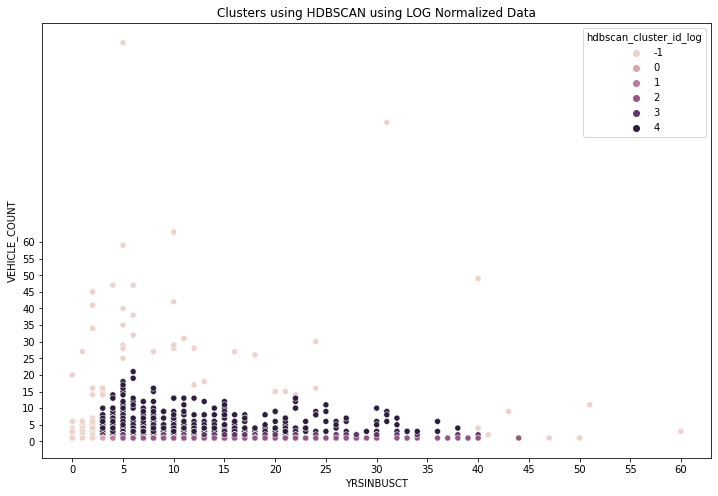

In [0]:
xlabel = df2['YRSINBUSCT']
xticks = np.arange(min(xlabel),max(xlabel)+1,5)
ylabel = df2['VEHICLE_COUNT']
yticks =  np.arange(min(xlabel),max(xlabel)+1,5)
plt.figure(figsize=(12,8))
sns.scatterplot(x=xlabel,y=ylabel,data=df2,hue=df2['hdbscan_cluster_id_log'])
plt.xticks(xticks)
plt.yticks(yticks)
plt.title('Clusters using HDBSCAN using LOG Normalized Data')
plt.show()

In [0]:
df2_hdbscan_log_agg = df2.groupby('hdbscan_cluster_id_log').agg(min_vehicle_cnt=('VEHICLE_COUNT', min)
                                                      ,max_vehicle_cnt=('VEHICLE_COUNT', max)                                                      
                                                      ,avg_vehicle_cnt=('VEHICLE_COUNT', 'mean')
                                                      ,min_yrs_bus=('YRSINBUSCT',min)
                                                      ,max_yrs_bus=('YRSINBUSCT',max)
                                                      ,avg_yrs_bus=('YRSINBUSCT','mean')
                                                      ,Total_policy_count=('VEHICLE_COUNT','count')
                                                     )
df2_hdbscan_log_agg.head(10)

Out[66]:

,min_vehicle_cnt,max_vehicle_cnt,avg_vehicle_cnt,min_yrs_bus,max_yrs_bus,avg_yrs_bus,Total_policy_count
hdbscan_cluster_id_log,,,,,,,
-1,1.0,120.0,4.647059,0.0,60.0,2.910588,425
0,1.0,1.0,1.000000,3.0,3.0,3.000000,200
1,1.0,1.0,1.000000,4.0,4.0,4.000000,231
2,1.0,1.0,1.000000,5.0,44.0,10.784141,1135
3,2.0,2.0,2.000000,3.0,40.0,8.883817,482
4,3.0,21.0,5.051546,3.0,38.0,10.192440,582
